##### DATA PREPROCESSING

In [1]:
# Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the dataset

gamingData = pd.read_csv("3.1 Gaming_data.csv.csv")

# view the first 5 rows of the data
gamingData.head()

,Steps,Points
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [3]:
# view the dataset information

gamingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Steps   10 non-null     int64
 1   Points  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


<Axes: xlabel='Steps', ylabel='Points'>

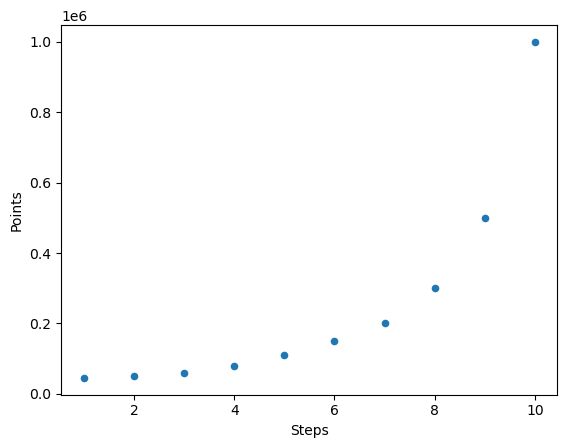

In [5]:
# view the scatter plot of the dataset

gamingData.plot(x="Steps", y="Points",kind="scatter")